# SLO Definition and Optimization Using AI

The purpose of this notebook is to guide operations professionals in experimenting with using AI to define Service Level Objectives (SLOs). By leveraging machine learning techniques, we aim to optimize the definition of SLOs to better align with business objectives and improve overall service quality.

This notebook is designed for operations professionals who have a basic understanding of data analysis and machine learning. It aims to provide a step-by-step guide that is easy to follow and well-documented.

## Importance of AI in Defining SLOs
Service Level Objectives (SLOs) are critical in ensuring that a service meets the expected performance and reliability standards. Traditionally, SLOs are defined based on historical data and expert judgment. However, with the advent of AI and machine learning, we can leverage data-driven approaches to optimize these definitions, leading to more accurate and effective SLOs.

## Overview of the Notebook
This notebook is structured as follows:
1. **Generating Mock Data:** Creating realistic mock data for experimentation.
2. **Exploratory Data Analysis (EDA):** Visualizing and understanding the data.
3. **Defining the SLO without AI:** Explaining the traditional method of defining SLOs.
4. **Feature Engineering:** Creating and selecting features for SLO definitions.
5. **Model Selection and Training:** Using machine learning models for SLO optimization.
6. **Model Evaluation:** Evaluating the performance of the models.
7. **Define Optimal SLOs:** Presenting and justifying the final SLO definitions.
8. **Show KPIs and Comparisons:** Demonstrating the effectiveness of the optimized SLOs.
9. **Conclusion:** Summarizing the findings and suggesting areas for further improvement.

Let's dive into each section step by step.

In [1]:
# Installing Required Libraries
%pip install pandas numpy seaborn matplotlib scikit-learn tabulate

  Using cached pandas-2.2.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached numpy-2.0.0-cp311-cp311-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.9.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached scikit_learn-1.5.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.2.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached py

In [2]:
# Consolidate all library imports at the beginning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

## Generating Mock Data

In this section, we generate realistic mock data to simulate real-world scenarios. This data will be used for experimentation and to demonstrate the process of defining and optimizing Service Level Objectives (SLOs) using AI.

### Purpose
Generating realistic mock data is crucial for testing and validating our machine learning models. It helps us to:
- Simulate real-world conditions.
- Validate the effectiveness of our models.
- Ensure the robustness and reliability of our approach.

### Implementation
We will create a dataset that includes various metrics relevant to SLOs, such as response times, error rates, and throughput. This dataset will be used throughout the notebook for exploratory data analysis, feature engineering, model training, and evaluation.

### Displaying the Generated Data
After generating the data, we will display the first few rows to understand its structure.

In [3]:
# Function to generate mock data
def generate_mock_data(seed=42, data_size=1000):
    """
    Generate mock data for SLO experimentation.

    Parameters:
    seed (int): Random seed for reproducibility.
    data_size (int): Number of data points to generate.

    Returns:
    pd.DataFrame: DataFrame containing generated mock data.
    """
    np.random.seed(seed)
    timestamps = pd.date_range(start="2023-01-01", periods=data_size, freq="H")

    latency = np.random.normal(loc=100, scale=20, size=data_size)
    error_rate = np.random.normal(loc=0.05, scale=0.01, size=data_size)
    error_rate = np.clip(error_rate, 0, 1)
    throughput = np.random.normal(loc=200, scale=50, size=data_size)
    availability = np.random.choice([0, 1], size=data_size, p=[0.01, 0.99])

    anomaly_fraction = 0.05
    anomaly_indices = np.random.choice(
        data_size, size=int(anomaly_fraction * data_size), replace=False
    )

    latency[anomaly_indices] = np.random.normal(
        loc=300, scale=50, size=len(anomaly_indices)
    )
    error_rate[anomaly_indices] = np.random.normal(
        loc=0.2, scale=0.05, size=len(anomaly_indices)
    )
    throughput[anomaly_indices] = np.random.normal(
        loc=100, scale=20, size=len(anomaly_indices)
    )
    availability[anomaly_indices] = np.random.choice(
        [0, 1], size=len(anomaly_indices), p=[0.2, 0.8]
    )

    data = pd.DataFrame(
        {
            "timestamp": timestamps,
            "latency": latency,
            "error_rate": error_rate,
            "throughput": throughput,
            "availability": availability,
        }
    )

    return data

In [4]:
# Generate the data and display the first few rows
data = generate_mock_data()

# Display the first few rows of the data
print(tabulate(data.head(), headers="keys", tablefmt="psql"))

+----+---------------------+-----------+--------------+--------------+----------------+
|    | timestamp           |   latency |   error_rate |   throughput |   availability |
|----+---------------------+-----------+--------------+--------------+----------------|
|  0 | 2023-01-01 00:00:00 |  109.934  |    0.0639936 |      166.241 |              1 |
|  1 | 2023-01-01 01:00:00 |   97.2347 |    0.0592463 |      192.774 |              1 |
|  2 | 2023-01-01 02:00:00 |  112.954  |    0.0505963 |      160.379 |              1 |
|  3 | 2023-01-01 03:00:00 |  130.461  |    0.0435306 |      184.602 |              1 |
|  4 | 2023-01-01 04:00:00 |   95.3169 |    0.0569822 |      105.319 |              1 |
+----+---------------------+-----------+--------------+--------------+----------------+


/var/folders/8r/2hn86n416n58v77nhrr2_mhw0000gn/T/ipykernel_27856/756640282.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start="2023-01-01", periods=data_size, freq="H")


## Exploratory Data Analysis (EDA)

In this section, we perform Exploratory Data Analysis (EDA) to gain insights into the generated mock data. EDA is crucial for understanding the dataset, identifying patterns, and preparing the data for machine learning models.

### Overview of the Dataset
We will start by getting a summary of the dataset, including data types and basic statistics.

### Calculating Descriptive Statistics
We will calculate descriptive statistics to understand the central tendency, dispersion, and shape of the data distributions.

### Visualizing Data Distributions and Relationships
We will create visualizations to identify trends, patterns, and correlations between variables. This helps in understanding the data better and uncovering any underlying structure.

### Detecting Outliers
We will identify and handle outliers in the data to ensure it does not adversely affect our model performance.

In [5]:
# Function to calculate descriptive statistics
def calculate_statistics(data, columns):
    """
    Calculate basic descriptive statistics for multiple columns in the dataframe.

    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    columns (list): List of column names for which to calculate statistics.

    Returns:
    pd.DataFrame: A dataframe containing the calculated statistics for each column.
    """
    stats = data[columns].describe().transpose()
    stats.reset_index(inplace=True)
    stats.rename(columns={"index": "Metric"}, inplace=True)
    return stats

In [6]:
# Function to visualize statistics in a matrix format
def visualize_statistics_matrix(stats):
    """
    Visualize the basic descriptive statistics in a matrix format.

    Parameters:
    stats (pd.DataFrame): The dataframe containing the statistics to visualize.
    """
    print(tabulate(stats, headers="keys", tablefmt="psql"))

In [7]:
# Function to plot metrics over time in a 2x2 grid
def plot_metrics_over_time(data, x_col, y_cols, titles, colors):
    """
    Plot multiple metrics over time in a 2x2 grid layout.

    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    x_col (str): The column name for the x-axis (timestamp).
    y_cols (list): List of column names for the y-axis (metrics).
    titles (list): List of titles for each subplot.
    colors (list): List of colors for each metric plot.
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    for ax, y_col, title, color in zip(axes, y_cols, titles, colors):
        sns.lineplot(data=data, x=x_col, y=y_col, color=color, ax=ax, linewidth=1.5)
        ax.set_title(title)
        ax.set_xlabel("Timestamp")
        ax.set_ylabel(y_col.capitalize())
    plt.tight_layout()
    plt.show()

In [8]:
# Function to plot histograms in a 2x2 grid
def plot_histograms(data, columns, colors):
    """
    Plot histograms for multiple columns in a 2x2 grid layout.

    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    columns (list): List of column names for which to plot histograms.
    colors (list): List of colors for each histogram.
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    axes = axes.flatten()
    for ax, column, color in zip(axes, columns, colors):
        sns.histplot(data[column], bins=30, kde=True, ax=ax, color=color)
        ax.set_title(f"Distribution of {column.capitalize()}")
        ax.set_xlabel(column.capitalize())
        ax.set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [9]:
# Function to plot KDE plots in a 2x2 grid
def plot_kde(data, columns, titles, colors):
    """
    Plot KDE plots for multiple columns in a 2x2 grid layout.

    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    columns (list): List of column names for the data to be plotted.
    titles (list): List of titles for each subplot.
    colors (list): List of colors for each KDE plot.
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    for ax, column, title, color in zip(axes, columns, titles, colors):
        sns.kdeplot(data[column], fill=True, color=color, ax=ax)
        ax.set_title(title)
        ax.set_xlabel(column.capitalize())
        ax.set_ylabel("Density")
    plt.tight_layout()
    plt.show()

In [10]:
# Function to plot boxplots in a 2x2 grid
def plot_boxplots(data, columns, colors):
    """
    Plot boxplots for multiple columns in a 2x2 grid layout to identify outliers.

    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    columns (list): List of column names for which to plot boxplots.
    colors (list): List of colors for each boxplot.
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    axes = axes.flatten()
    for ax, column, color in zip(axes, columns, colors):
        sns.boxplot(x=data[column], ax=ax, color=color)
        ax.set_title(f"Boxplot of {column.capitalize()}")
        ax.set_xlabel(column.capitalize())
    plt.tight_layout()
    plt.show()

+----+--------------+---------+-------------+------------+------------+-------------+-------------+-------------+------------+
|    | Metric       |   count |        mean |        std |        min |         25% |         50% |         75% |        max |
|----+--------------+---------+-------------+------------+------------+-------------+-------------+-------------+------------|
|  0 | latency      |    1000 | 110.585     | 48.8556    | 35.1747    |  88.3996    | 101.689     | 115.436     | 431.572    |
|  1 | error_rate   |    1000 |   0.0585776 |  0.0374994 |  0.0205961 |   0.0444134 |   0.0512294 |   0.0589861 |   0.338307 |
|  2 | throughput   |    1000 | 195.541     | 52.5436    | 49.0244    | 159.554     | 196.857     | 230.884     | 396.312    |
|  3 | availability |    1000 |   0.982     |  0.133018  |  0         |   1         |   1         |   1         |   1        |
+----+--------------+---------+-------------+------------+------------+-------------+-------------+------------

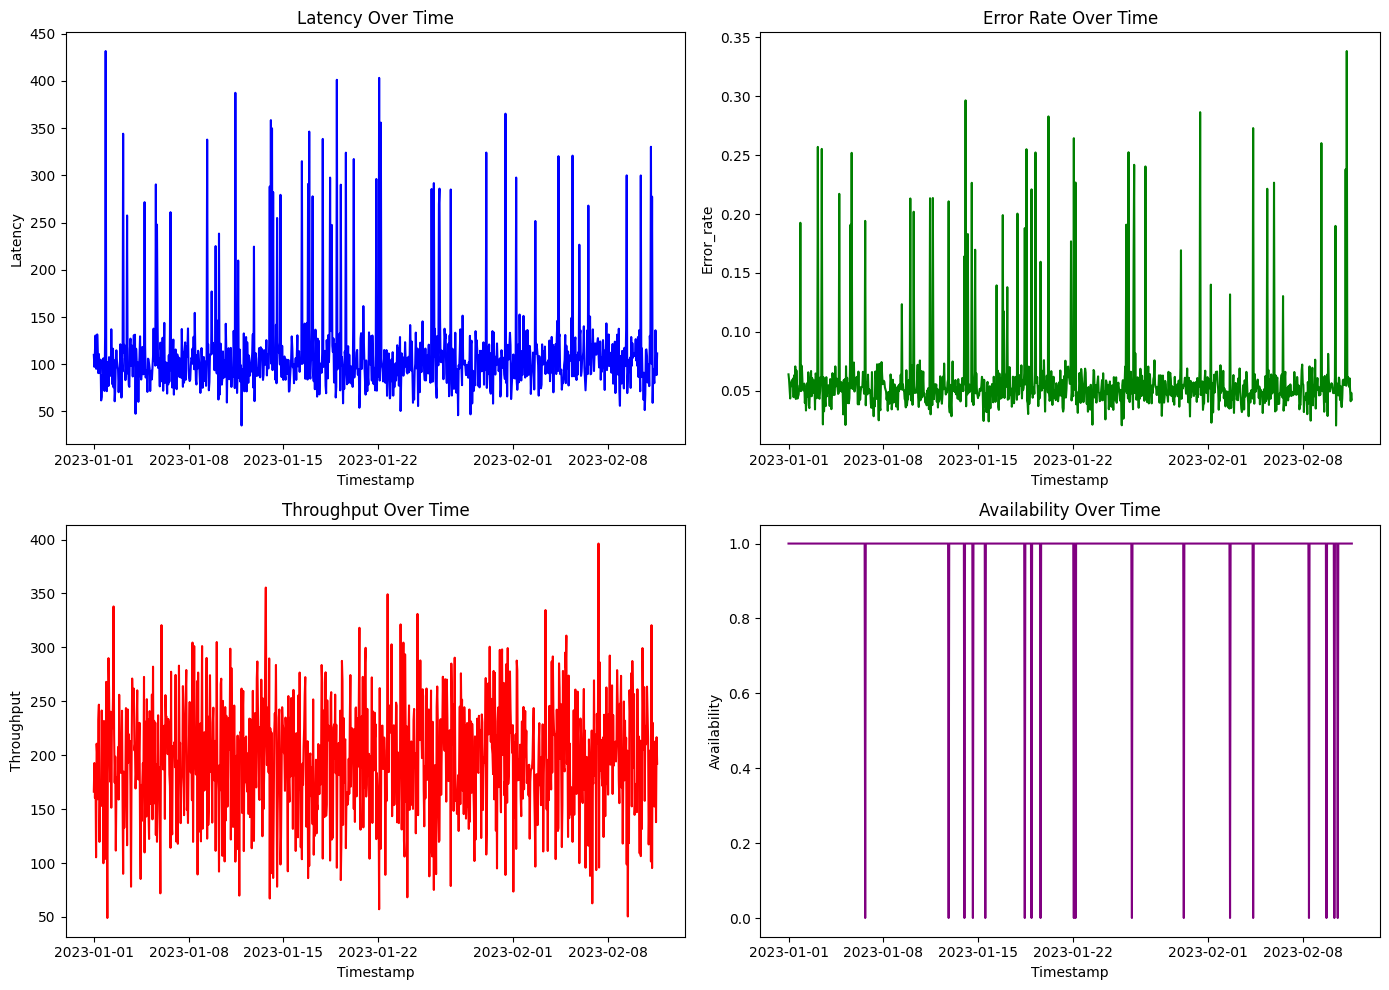

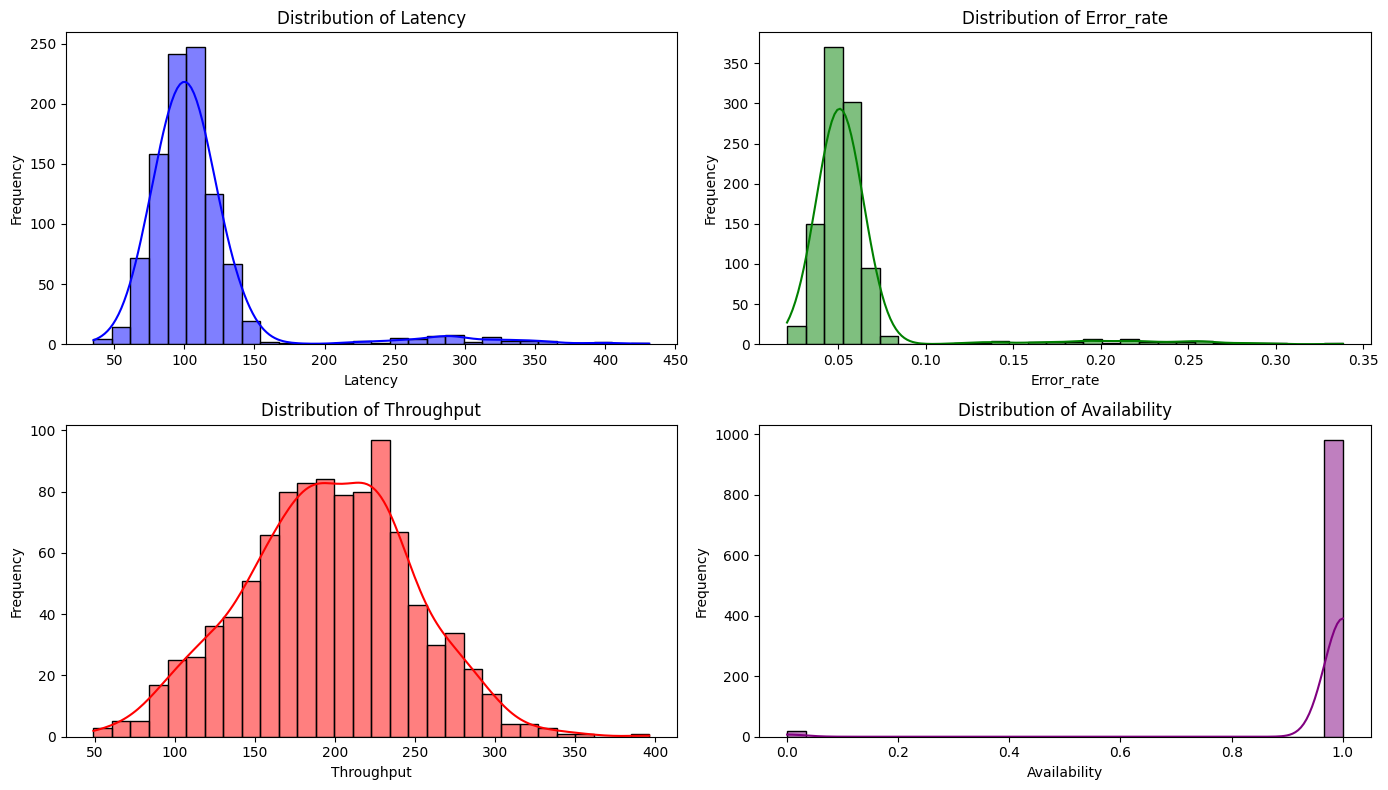

In [11]:
# Perform EDA: Calculate and visualize statistics, plot metrics, histograms, KDE plots, and boxplots

# Columns to analyze
columns_to_analyze = ["latency", "error_rate", "throughput", "availability"]

# Calculate statistics for the specified columns
stats = calculate_statistics(data, columns_to_analyze)

# Visualize the statistics in a matrix format
visualize_statistics_matrix(stats)

# Define titles and colors for plots
titles = [
    "Latency Over Time",
    "Error Rate Over Time",
    "Throughput Over Time",
    "Availability Over Time",
]
colors = ["blue", "green", "red", "purple"]

# Plot metrics over time
plot_metrics_over_time(data, "timestamp", columns_to_analyze, titles, colors)

# Plot histograms
plot_histograms(data, columns_to_analyze, colors)

# Plot KDE plots
# plot_kde(data, columns_to_analyze, titles, colors)

# Plot boxplots
# plot_boxplots(data, columns_to_analyze, colors)


## Defining Service Level Objectives (SLOs) Without AI

In this section, we will define Service Level Objectives (SLOs) based on traditional methods. This involves understanding the business context, identifying relevant metrics, and making informed assumptions.

### Understanding Business Context and Goals
We need to comprehend the importance of SLOs in the business and how they align with organizational goals. This includes:
- Providing an overview of the service or system being monitored.
- Describing the business goals that the SLOs should support, such as ensuring high availability and minimizing latency.
- Identifying key stakeholders and their requirements.

### Identifying Relevant Metrics
We will determine which metrics are critical for monitoring and maintaining service levels. These typically include:
- **Latency:** Define acceptable latency thresholds to ensure a responsive user experience.
- **Error Rate:** Establish acceptable error rates to maintain service reliability.
- **Throughput:** Set throughput targets to ensure the system can handle the expected load.
- **Availability:** Define availability targets to ensure the system is operational when needed.

### Making Assumptions Based on Historical Data and Industry Standards
To define realistic and achievable SLOs, we will make assumptions based on:
- **Historical Data Analysis:** Using historical data to inform the SLO thresholds.
- **Industry Standards:** Considering industry standards and best practices for defining SLOs.
- **Stakeholder Input:** Incorporating input from stakeholders to ensure the SLOs align with their expectations.

### Calculating and Evaluating Traditional SLOs
We will calculate the SLO thresholds based on the collected data and evaluate the data against these thresholds to generate results. This involves:
- Calculating the 95th percentile for latency, error rate, and availability to set realistic upper thresholds.
- Calculating the 5th percentile for throughput to set a realistic lower threshold.
- Implementing a function to evaluate the data against these thresholds and generate results.

In [12]:
# Function to calculate SLO thresholds
def calculate_slo_thresholds(data):
    """
    Calculate SLO thresholds based on the collected data.

    Parameters:
    data (pd.DataFrame): The dataframe containing the data.

    Returns:
    dict: A dictionary with SLO thresholds for latency, error rate, throughput, and availability.
    """
    slo_thresholds = {
        "latency": np.percentile(data["latency"], 95),  # 95th percentile for latency
        "error_rate": np.percentile(
            data["error_rate"], 95
        ),  # 95th percentile for error rate
        "throughput": np.percentile(
            data["throughput"], 5
        ),  # 5th percentile for throughput
        "availability": np.percentile(
            data["availability"] * 100, 95
        ),  # 95th percentile for availability
    }
    return slo_thresholds

In [13]:
# Function to evaluate SLOs
def evaluate_slos(data, slo_thresholds):
    """
    Evaluate the data against the defined SLO thresholds.

    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    slo_thresholds (dict): A dictionary with SLO thresholds.

    Returns:
    dict: A dictionary with the evaluation results for each metric.
    """
    results = {}
    results["latency"] = (data["latency"] < slo_thresholds["latency"]).mean() * 100
    results["error_rate"] = (
        data["error_rate"] < slo_thresholds["error_rate"]
    ).mean() * 100
    results["throughput"] = (
        data["throughput"] >= slo_thresholds["throughput"]
    ).mean() * 100
    results["availability"] = (
        data["availability"] * 100 >= slo_thresholds["availability"]
    ).mean() * 100
    return results

In [14]:
# Calculate SLO thresholds and evaluate SLOs, display the results

# Calculate SLO thresholds
slo_thresholds = calculate_slo_thresholds(data)

# Evaluate SLOs
slo_evaluation_results = evaluate_slos(data, slo_thresholds)

# Display SLO thresholds and evaluation results
print("Defined SLO Thresholds:")
for metric, threshold in slo_thresholds.items():
    print(f"{metric.capitalize()} SLO Threshold: {threshold:.2f}")

print("\nSLO Evaluation Results:")
for metric, result in slo_evaluation_results.items():
    print(f"{metric.capitalize()} SLO: {result:.2f}% of requests meet the SLO")

Defined SLO Thresholds:
Latency SLO Threshold: 178.69
Error_rate SLO Threshold: 0.08
Throughput SLO Threshold: 105.26
Availability SLO Threshold: 100.00

SLO Evaluation Results:
Latency SLO: 95.00% of requests meet the SLO
Error_rate SLO: 95.00% of requests meet the SLO
Throughput SLO: 95.00% of requests meet the SLO
Availability SLO: 98.20% of requests meet the SLO


In [15]:
def plot_bubble_charts_with_slos(data, columns, titles, slo_thresholds, colors):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for ax, column, title, color in zip(axes, columns, titles, colors):
        value_counts = data[column].value_counts().reset_index()
        value_counts.columns = [column, "Frequency"]

        ax.scatter(
            value_counts.index,
            value_counts[column],
            s=value_counts["Frequency"] * 20,  # Adjust size for better visualization
            color=color,
            edgecolor="black",
            alpha=0.6,
        )

        ax.set_title(title, fontsize=14, weight="bold")
        ax.set_xlabel("Index", fontsize=12)
        ax.set_ylabel(column.capitalize(), fontsize=12)

        # Plot SLO threshold line
        slo_threshold = slo_thresholds[column]
        ax.axhline(
            y=slo_threshold,
            color="red",
            linestyle="--",
            linewidth=2,
            label=f"SLO Threshold: {slo_threshold:.2f}",
        )
        ax.legend(loc="upper right", fontsize=12)

        ax.grid(
            visible=True, which="major", color="lightgrey", linestyle="-", linewidth=0.5
        )
        ax.grid(
            visible=True,
            which="minor",
            color="lightgrey",
            linestyle="--",
            linewidth=0.5,
        )

    plt.tight_layout()
    plt.show()


# Plot histograms with SLO thresholds and annotations
def plot_histograms_with_slo(data, slo_thresholds, columns, colors):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for ax, column, color in zip(axes, columns, colors):
        sns.histplot(data[column], bins=30, kde=True, ax=ax, color=color)
        ax.axvline(
            x=slo_thresholds[column],
            color="red",
            linestyle="--",
            linewidth=2,
            label=f"SLO Threshold: {slo_thresholds[column]:.2f}",
        )
        ax.set_title(f"Distribution of {column.capitalize()} with SLO", fontsize=14)
        ax.set_xlabel(column.capitalize(), fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)
        ax.legend(loc="upper right", fontsize=12)

        # Add annotations
        if column in ["latency", "error_rate", "availability"]:
            ax.annotate(
                "Values below threshold\nare acceptable",
                xy=(slo_thresholds[column], ax.get_ylim()[1] / 2),
                xytext=(
                    slo_thresholds[column] + ax.get_xlim()[1] / 10,
                    ax.get_ylim()[1] / 1.5,
                ),
                arrowprops=dict(facecolor="black", shrink=0.05),
                fontsize=12,
                color="black",
            )
        else:
            ax.annotate(
                "Values above threshold\nare acceptable",
                xy=(slo_thresholds[column], ax.get_ylim()[1] / 2),
                xytext=(
                    slo_thresholds[column] - ax.get_xlim()[1] / 10,
                    ax.get_ylim()[1] / 1.5,
                ),
                arrowprops=dict(facecolor="black", shrink=0.05),
                fontsize=12,
                color="black",
            )

    plt.tight_layout()
    plt.show()




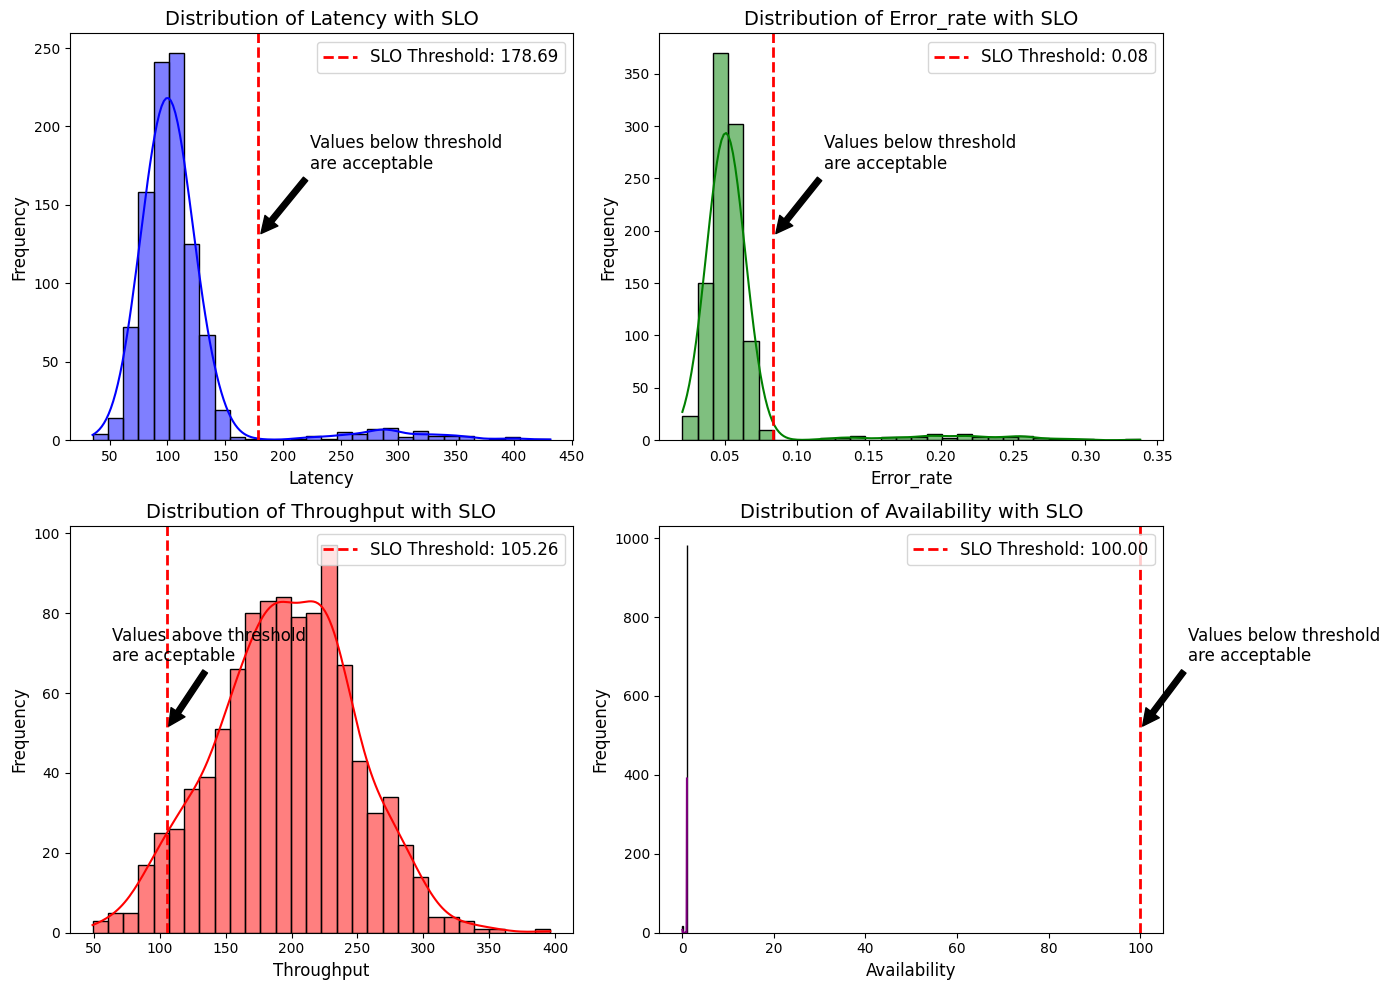

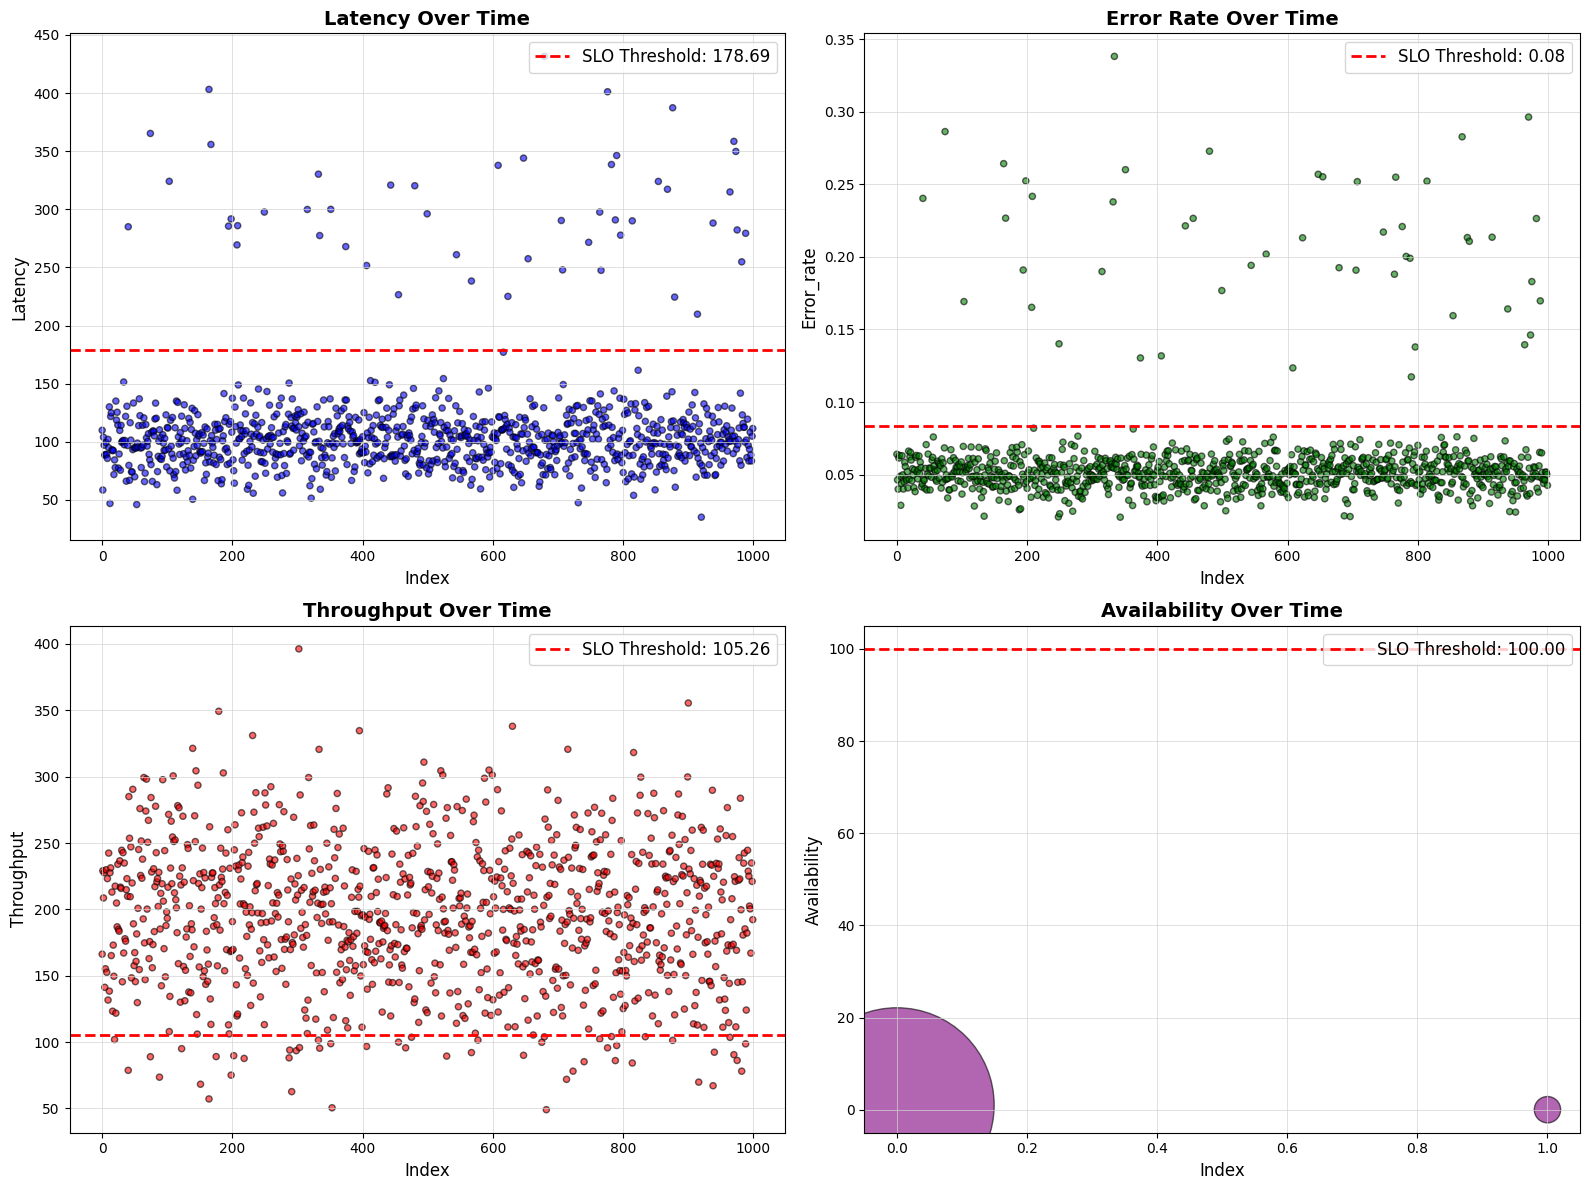

In [16]:
# Plot all histograms in a 2x2 grid layout with SLO thresholds
plot_histograms_with_slo(data, slo_thresholds, columns_to_analyze, colors)


# Plot all bubble charts in a 2x2 grid layout with SLO thresholds
plot_bubble_charts_with_slos(data, columns_to_analyze, titles, slo_thresholds, colors)

## Feature Engineering

In this section, we will focus on creating and transforming features to enhance the predictive power of our machine learning models. Feature engineering is a critical step in the machine learning pipeline that can significantly impact model performance.

### Creating and Transforming Features
We will develop new features based on domain knowledge and data exploration insights. Additionally, we will apply necessary transformations to improve feature representation.

### Handling Missing Values
We will ensure that missing values are appropriately handled to prevent issues in model training and evaluation.

### Normalizing and Standardizing Features
To ensure consistency and improve model performance, we will normalize or standardize features to bring them onto a comparable scale.

### Displaying Transformed Data
We will display the first few rows of the transformed data to understand the changes and improvements made during feature engineering.

In [17]:
# Function to perform feature engineering
def feature_engineering(data):
    """
    Perform feature engineering on the dataset.

    Parameters:
    data (pd.DataFrame): The dataframe containing the original data.

    Returns:
    pd.DataFrame: A dataframe with new and transformed features.
    """
    # Handle invalid values for log transformation
    data["latency"] = data["latency"].apply(lambda x: x if x > 0 else 1)
    data["error_rate"] = data["error_rate"].apply(lambda x: x if x > 0 else 1e-6)
    data["throughput"] = data["throughput"].apply(lambda x: x if x > 0 else 1)

    # Create new features based on domain knowledge
    data["latency_log"] = np.log1p(
        data["latency"]
    )  # Log transformation to handle skewness
    data["error_rate_log"] = np.log1p(
        data["error_rate"]
    )  # Log transformation for error rate
    data["throughput_log"] = np.log1p(
        data["throughput"]
    )  # Log transformation for throughput

    # Example feature: Rolling mean and standard deviation
    data["latency_roll_mean"] = data["latency"].rolling(window=24, min_periods=1).mean()
    data["latency_roll_std"] = data["latency"].rolling(window=24, min_periods=1).std()

    # Extract time-based features
    data["hour"] = data["timestamp"].dt.hour
    data["day_of_week"] = data["timestamp"].dt.dayofweek
    data["is_weekend"] = data["day_of_week"].isin([5, 6]).astype(int)

    # Handle missing values by filling with the mean of the column
    data.fillna(data.mean(), inplace=True)

    return data

In [18]:
# Apply feature engineering and display the first few rows of transformed data

# Apply feature engineering
data_fe = feature_engineering(data)

# Display the first few rows of the transformed data
print(tabulate(data_fe.head(), headers="keys", tablefmt="psql"))

+----+---------------------+-----------+--------------+--------------+----------------+---------------+------------------+------------------+---------------------+--------------------+--------+---------------+--------------+
|    | timestamp           |   latency |   error_rate |   throughput |   availability |   latency_log |   error_rate_log |   throughput_log |   latency_roll_mean |   latency_roll_std |   hour |   day_of_week |   is_weekend |
|----+---------------------+-----------+--------------+--------------+----------------+---------------+------------------+------------------+---------------------+--------------------+--------+---------------+--------------|
|  0 | 2023-01-01 00:00:00 |  109.934  |    0.0639936 |      166.241 |              1 |       4.70894 |        0.0620293 |          5.11944 |             109.934 |           43.4977  |      0 |             6 |            1 |
|  1 | 2023-01-01 01:00:00 |   97.2347 |    0.0592463 |      192.774 |              1 |       4.5873

## Anomaly Detection and Visualization

In this section, we will identify anomalies in the metrics and visualize them. Anomalies are defined as points where the metric values deviate significantly from the norm.

### Identifying Anomalies Based on Statistical Thresholds
We will define anomalies using statistical thresholds, such as the 95th percentile for metrics like latency and error rate, and the 5th percentile for throughput. This helps us pinpoint unusual behavior in the data.

### Visualizing Anomalies Over Time
We will create plots to visualize the anomalies over time, making it easier to understand when and how often these anomalies occur.

In [19]:
# Function to identify anomalies
def identify_anomalies(data):
    """
    Identify anomalies in the dataset based on statistical thresholds.

    Parameters:
    data (pd.DataFrame): The dataframe containing the metrics.

    Returns:
    pd.DataFrame: The dataframe with additional columns indicating anomalies.
    """
    anomaly_thresholds = {
        "latency": np.percentile(data["latency"], 95),
        "error_rate": np.percentile(data["error_rate"], 95),
        "throughput": np.percentile(data["throughput"], 5),
        "availability": np.percentile(data["availability"] * 100, 95),
    }

    data["latency_anomaly"] = data["latency"] > anomaly_thresholds["latency"]
    data["error_rate_anomaly"] = data["error_rate"] > anomaly_thresholds["error_rate"]
    data["throughput_anomaly"] = data["throughput"] < anomaly_thresholds["throughput"]
    data["availability_anomaly"] = (data["availability"] * 100) < anomaly_thresholds[
        "availability"
    ]

    return data

In [20]:
# Identify anomalies and display the first few rows of the data with anomalies

# Identify anomalies
data_with_anomalies = identify_anomalies(data_fe)

# Display the first few rows of the data with anomalies
print(tabulate(data_with_anomalies.head(), headers="keys", tablefmt="psql"))

+----+---------------------+-----------+--------------+--------------+----------------+---------------+------------------+------------------+---------------------+--------------------+--------+---------------+--------------+-------------------+----------------------+----------------------+------------------------+
|    | timestamp           |   latency |   error_rate |   throughput |   availability |   latency_log |   error_rate_log |   throughput_log |   latency_roll_mean |   latency_roll_std |   hour |   day_of_week |   is_weekend | latency_anomaly   | error_rate_anomaly   | throughput_anomaly   | availability_anomaly   |
|----+---------------------+-----------+--------------+--------------+----------------+---------------+------------------+------------------+---------------------+--------------------+--------+---------------+--------------+-------------------+----------------------+----------------------+------------------------|
|  0 | 2023-01-01 00:00:00 |  109.934  |    0.063993

In [21]:
# Function to plot anomalies in a 2x2 grid layout
def plot_anomalies(data, columns, anomaly_columns, titles, colors, anomaly_color="red"):
    """
    Plot anomalies in a 2x2 grid layout.

    Parameters:
    data (pd.DataFrame): The dataframe containing the data and anomalies.
    columns (list): List of column names for the data to be plotted.
    anomaly_columns (list): List of column names indicating anomalies.
    titles (list): List of titles for each subplot.
    colors (list): List of colors for each plot.
    anomaly_color (str): Color to use for highlighting anomalies.
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for ax, column, anomaly_column, title, color in zip(
        axes, columns, anomaly_columns, titles, colors
    ):
        ax.plot(
            data["timestamp"],
            data[column],
            color=color,
            label=f"Normal {column.capitalize()}",
        )
        ax.scatter(
            data.loc[data[anomaly_column], "timestamp"],
            data.loc[data[anomaly_column], column],
            color=anomaly_color,
            label="Anomalies",
        )
        ax.set_title(title)
        ax.set_xlabel("Timestamp")
        ax.set_ylabel(column.capitalize())
        ax.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

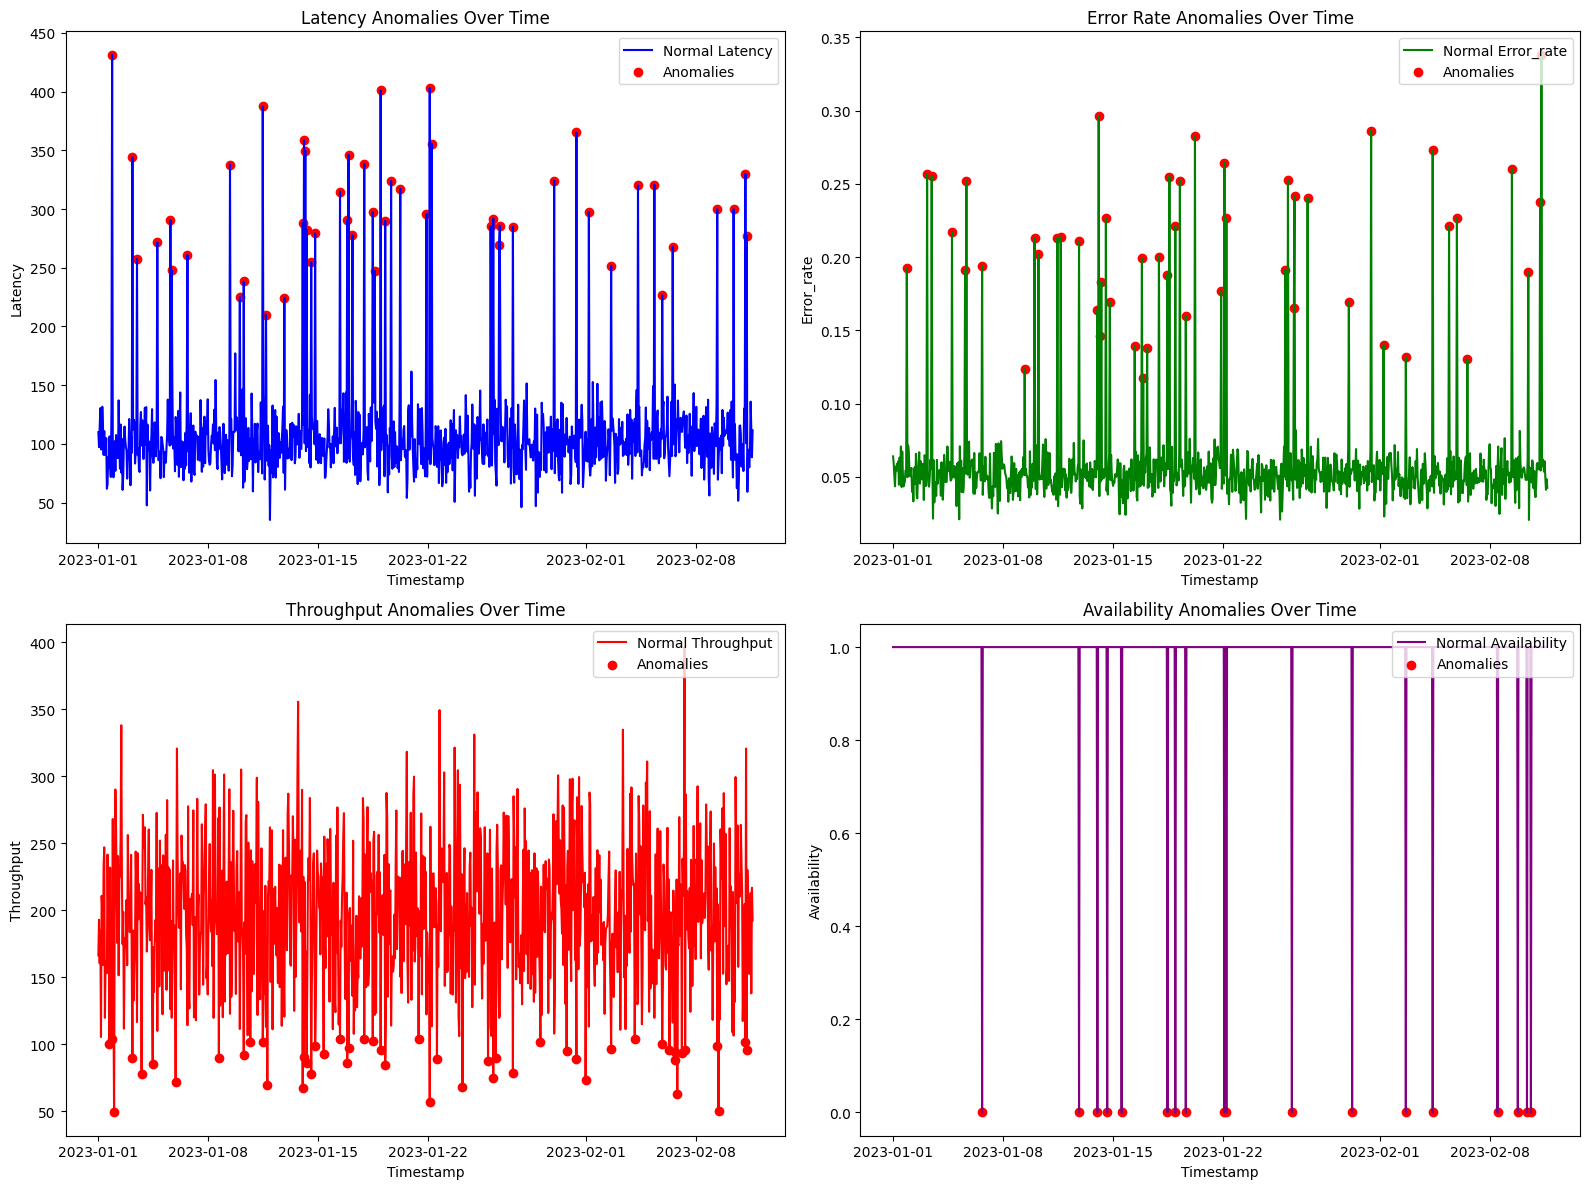

In [22]:
# Plot anomalies in a 2x2 grid layout

# Define columns and titles for the plots
columns_to_plot = ["latency", "error_rate", "throughput", "availability"]
anomaly_columns = [
    "latency_anomaly",
    "error_rate_anomaly",
    "throughput_anomaly",
    "availability_anomaly",
]
titles = [
    "Latency Anomalies Over Time",
    "Error Rate Anomalies Over Time",
    "Throughput Anomalies Over Time",
    "Availability Anomalies Over Time",
]
colors = ["blue", "green", "red", "purple"]

# Plot anomalies in a 2x2 grid layout
plot_anomalies(data_with_anomalies, columns_to_plot, anomaly_columns, titles, colors)

## Model Selection and Training

In this section, we will select appropriate machine learning models and train them on the engineered features. This process involves choosing models that are well-suited to the problem, tuning their hyperparameters, and evaluating their performance.

### Selecting Appropriate Machine Learning Models
We will choose machine learning models that are suitable for predicting our target variables.

### Splitting Data into Training and Testing Sets
We will split the data into training and testing sets to evaluate model performance on unseen data.

### Hyperparameter Tuning Using GridSearchCV
To optimize model performance, we will perform hyperparameter tuning using GridSearchCV, which allows us to find the best combination of hyperparameters.

### Evaluating Model Performance
We will evaluate the trained models using appropriate metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² Score.

### Displaying Model Performance Metrics
The results of the model evaluation will be displayed in a readable format to facilitate comparison and selection of the best model.


In [23]:
# Initialize models with hyperparameter grids for tuning
models_with_params = {
    "LinearRegression": (LinearRegression(), {}),
    "RandomForestRegressor": (
        RandomForestRegressor(random_state=42),
        {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
        },
    ),
    "GradientBoostingRegressor": (
        GradientBoostingRegressor(random_state=42),
        {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
        },
    ),
}

In [24]:
# Function to perform hyperparameter tuning using GridSearchCV
def hyperparameter_tuning(model, param_grid, X_train, y_train):
    """
    Perform hyperparameter tuning using GridSearchCV.

    Parameters:
    model (estimator): The machine learning model to tune.
    param_grid (dict): The hyperparameter grid to search.
    X_train (pd.DataFrame): Training feature data.
    y_train (pd.Series): Training target data.

    Returns:
    estimator: The model with the best combination of hyperparameters.
    """
    grid_search = GridSearchCV(
        estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

In [25]:
# Perform hyperparameter tuning and evaluate models, display best model results

# Define features and target
features = data_fe.drop(columns=["timestamp", "latency"])
target = data_fe["latency"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Perform hyperparameter tuning and evaluate models
best_models = {}
for model_name, (model, params) in models_with_params.items():
    if params:
        tuned_model = hyperparameter_tuning(model, params, X_train, y_train)
    else:
        tuned_model = model.fit(X_train, y_train)
    best_models[model_name] = tuned_model
    print(f"Best model parameters for {model_name}: {tuned_model.get_params()}")


# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    return {
        "Model": model.__class__.__name__,
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test),
        "Train RMSE": mean_squared_error(y_train, y_pred_train, squared=False),
        "Test RMSE": mean_squared_error(y_test, y_pred_test, squared=False),
        "Train R2": r2_score(y_train, y_pred_train),
        "Test R2": r2_score(y_test, y_pred_test),
    }


# Evaluate each best model
best_model_results = []
for model_name, model in best_models.items():
    results = evaluate_model(model, X_train, X_test, y_train, y_test)
    best_model_results.append(results)

# Create a DataFrame to display the best model results
best_model_results_df = pd.DataFrame(best_model_results)

# Display the results in a readable format
print("\nBest Model Performance Metrics (after tuning):\n")
print(tabulate(best_model_results_df, headers="keys", tablefmt="fancy_grid"))

Best model parameters for LinearRegression: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s


/Users/gsampaio/redhat/ai/service-level-objective-ai/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/gsampaio/redhat/ai/service-level-objective-ai/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/gsampaio/redhat/ai/service-level-objective-ai/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/gsampaio/redhat/ai/service-level-objective-ai/.venv/lib/python3.11/si


Best Model Performance Metrics (after tuning):

╒════╤═══════════════════════════╤═════════════╤════════════╤══════════════╤═════════════╤════════════╤═══════════╕
│    │ Model                     │   Train MAE │   Test MAE │   Train RMSE │   Test RMSE │   Train R2 │   Test R2 │
╞════╪═══════════════════════════╪═════════════╪════════════╪══════════════╪═════════════╪════════════╪═══════════╡
│  0 │ LinearRegression          │    3.4268   │   3.32895  │     7.82071  │     6.98843 │   0.974114 │  0.980228 │
├────┼───────────────────────────┼─────────────┼────────────┼──────────────┼─────────────┼────────────┼───────────┤
│  1 │ RandomForestRegressor     │    0.183984 │   0.511639 │     1.09902  │     2.38874 │   0.999489 │  0.99769  │
├────┼───────────────────────────┼─────────────┼────────────┼──────────────┼─────────────┼────────────┼───────────┤
│  2 │ GradientBoostingRegressor │    0.12528  │   0.576232 │     0.163942 │     1.71767 │   0.999989 │  0.998806 │
╘════╧═════════════════

/Users/gsampaio/redhat/ai/service-level-objective-ai/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/gsampaio/redhat/ai/service-level-objective-ai/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


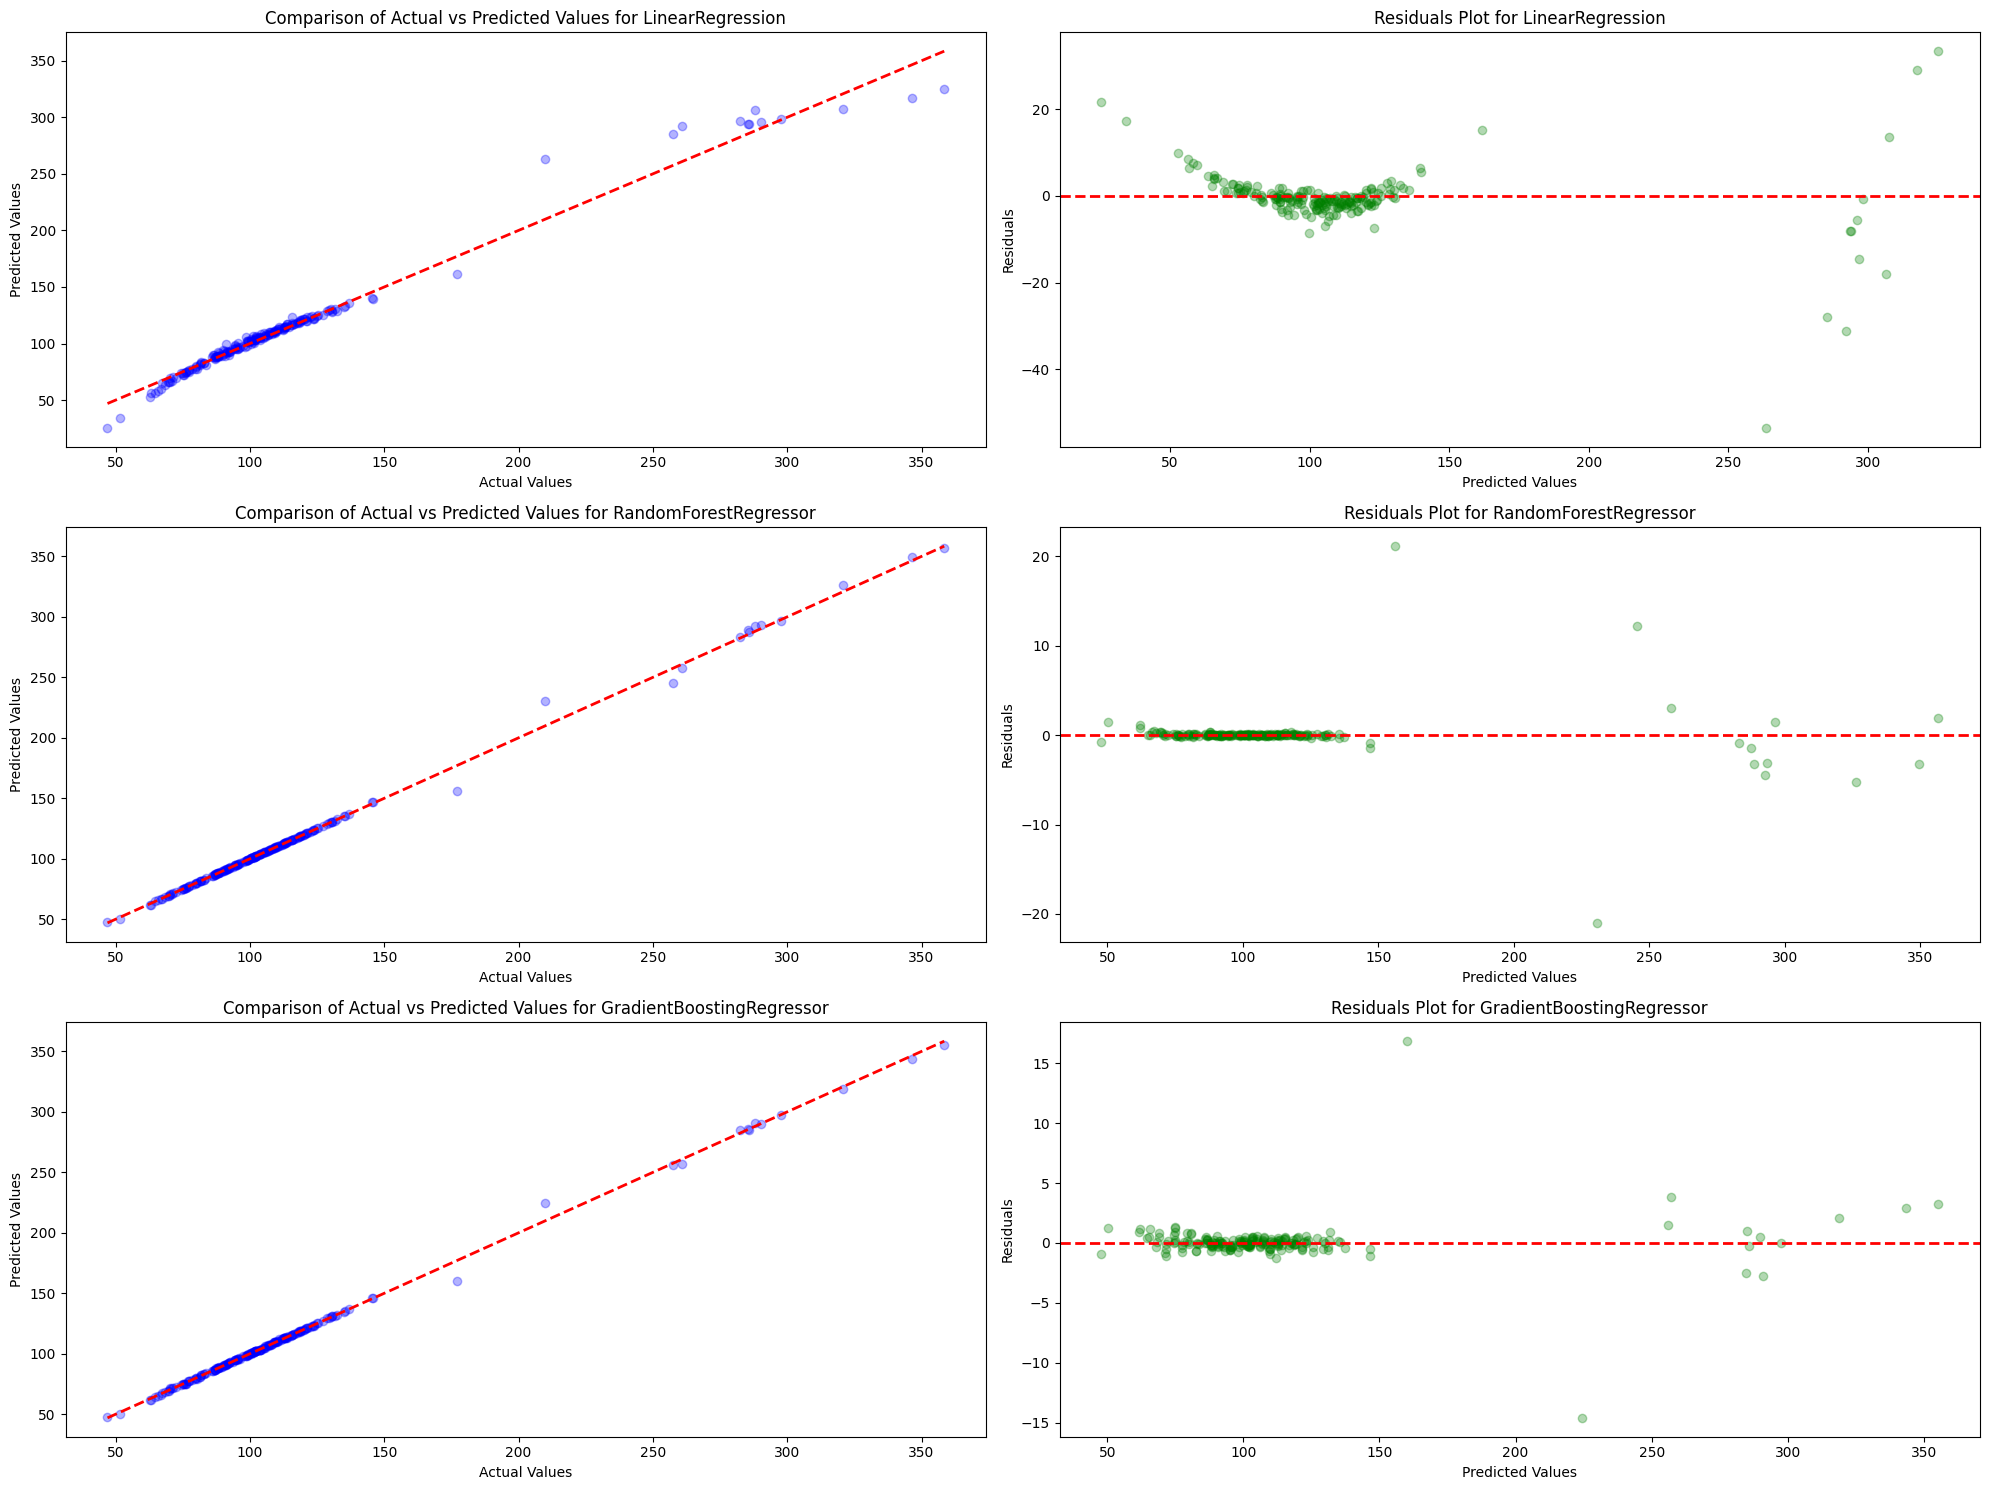

In [26]:
# Function to plot model comparison with actual vs predicted and residuals
def plot_model_comparison(models, X_train, X_test, y_train, y_test):
    """
    Plot comparison of actual vs predicted values and residuals for each model.

    Parameters:
    models (dict): Dictionary containing the trained models.
    X_train (pd.DataFrame): Training feature data.
    X_test (pd.DataFrame): Testing feature data.
    y_train (pd.Series): Training target data.
    y_test (pd.Series): Testing target data.
    """
    plt.figure(figsize=(20, 15))

    for i, (model_name, model) in enumerate(models.items()):
        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Comparison of actual vs predicted
        plt.subplot(len(models), 2, i * 2 + 1)
        plt.scatter(y_test, y_pred, alpha=0.3, color="blue")
        plt.plot(
            [y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            color="red",
            linestyle="--",
            linewidth=2,
        )
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title(f"Comparison of Actual vs Predicted Values for {model_name}")

        # Residuals plot
        residuals = y_test - y_pred
        plt.subplot(len(models), 2, i * 2 + 2)
        plt.scatter(y_pred, residuals, alpha=0.3, color="green")
        plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.title(f"Residuals Plot for {model_name}")

    plt.tight_layout()
    plt.show()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Plot the model comparison
plot_model_comparison(best_models, X_train, X_test, y_train, y_test)

## Define Optimal SLOs Using AI

In this section, we will define the optimal Service Level Objectives (SLOs) based on our model predictions and analysis. We will present the final SLO definitions and explain why they were chosen over other possible options.

### Analyzing Model Predictions
We will use the predictions from the best models to understand the performance metrics.

### Plot Predictions
We will plot the model predictions to visualize the data distribution and identify trends.

### Setting SLO Thresholds Based on Predicted Values
We will establish thresholds for each metric based on the 95th percentile of the predicted values.

### Justifying the Chosen Thresholds
We will explain the rationale behind each threshold, considering factors such as industry standards, customer needs, and business objectives.

### Visualizing and Comparing SLO Thresholds
We will create visualizations to compare the preliminary SLO thresholds with those derived from AI predictions, highlighting the improvements.


In [27]:
# Function to define and justify optimal SLOs
def define_optimal_slos(model, data, target_column):
    """
    Define and justify optimal SLOs using model predictions.

    Parameters:
    model (estimator): The trained machine learning model.
    data (pd.DataFrame): The dataframe containing the features.
    target_column (str): The name of the target column for predictions.

    Returns:
    float: The optimal SLO threshold based on the 95th percentile of the predicted values.
    """
    predictions = model.predict(data.drop(columns=["timestamp", target_column]))
    data["predicted_" + target_column] = predictions

    slo_threshold = np.percentile(predictions, 95)
    return slo_threshold, data


# Train the best model on the entire dataset, make predictions, and define optimal SLOs
best_model_name = best_model_results_df.loc[best_model_results_df["Test R2"].idxmax()][
    "Model"
]
best_model = best_models[best_model_name]

# Define optimal SLOs using AI
slo_latency_ai, data_fe = define_optimal_slos(best_model, data_fe, "latency")

print(f"SLO for Latency based on AI (95th percentile): {slo_latency_ai} ms")

SLO for Latency based on AI (95th percentile): 164.5387611667582 ms


In [28]:
# Function to plot latency histogram with SLO thresholds and annotations
def plot_latency_histogram_with_slo_comparison(
    data, preliminary_slo, predicted_slo, column, color
):
    """
    Plot latency histogram with SLO thresholds and annotations.

    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    preliminary_slo (float): The preliminary SLO threshold.
    predicted_slo (float): The predicted SLO threshold based on AI.
    column (str): The column name for latency data.
    color (str): The color for the histogram plot.
    """
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.histplot(data[column], bins=30, kde=True, ax=ax, color=color)

    # Plot preliminary SLO threshold
    ax.axvline(
        x=preliminary_slo,
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Preliminary SLO: {preliminary_slo:.2f} ms",
    )

    # Plot predicted SLO threshold
    ax.axvline(
        x=predicted_slo,
        color="green",
        linestyle="--",
        linewidth=2,
        label=f"Predicted SLO: {predicted_slo:.2f} ms",
    )

    ax.set_title(f"Distribution of {column.capitalize()} with SLOs", fontsize=16)
    ax.set_xlabel(column.capitalize(), fontsize=14)
    ax.set_ylabel("Frequency", fontsize=14)
    ax.legend(loc="upper right", fontsize=14)

    plt.tight_layout()
    plt.show()

Preliminary SLO for Latency (95th percentile): 178.6919817207015 ms
Predicted SLO for Latency (95th percentile): 164.5387611667582 ms


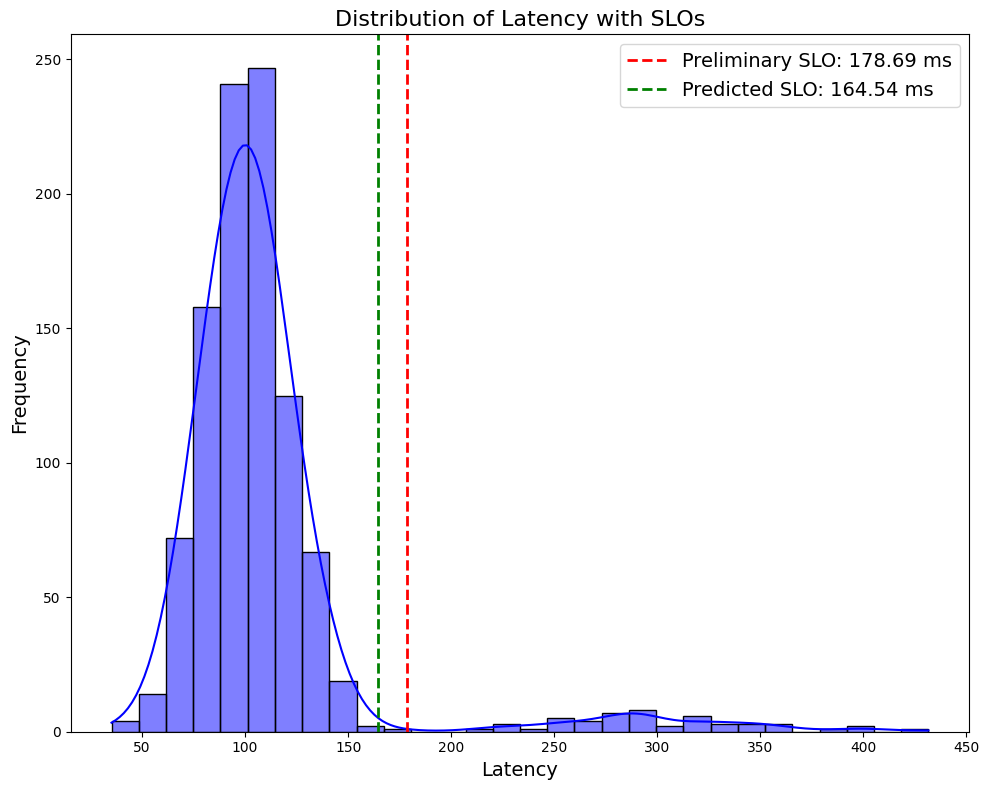

In [29]:
# Plot latency histogram with both preliminary and predicted SLO thresholds

# Define column and color for the plot
column_to_plot = "latency"
color = "blue"

print(
    f"Preliminary SLO for Latency (95th percentile): {slo_thresholds[column_to_plot]} ms"
)
print(f"Predicted SLO for Latency (95th percentile): {slo_latency_ai} ms")

# Plot latency histogram with both SLO thresholds
plot_latency_histogram_with_slo_comparison(
    data_fe, slo_thresholds[column_to_plot], slo_latency_ai, column_to_plot, color
)

## Summary and Conclusion

In this notebook, we have demonstrated the process of defining and optimizing Service Level Objectives (SLOs) using AI. We followed best practices in machine learning to ensure robust, reliable, and reproducible results. Here is a summary of the steps we took:

### Summary of Steps
1. **Generating Mock Data:**
   - We generated realistic mock data to simulate real-world scenarios for SLO experimentation.

2. **Exploratory Data Analysis (EDA):**
   - We performed EDA to gain insights into the generated data, identify patterns, and detect outliers.

3. **Defining SLOs Without AI:**
   - We defined SLOs based on traditional methods and evaluated the data against these thresholds.

4. **Feature Engineering:**
   - We created new features and transformed existing ones to improve the predictive power of our machine learning models.

5. **Anomaly Detection and Visualization:**
   - We identified anomalies in the metrics and visualized them over time.

6. **Model Selection and Training:**
   - We selected appropriate machine learning models, performed hyperparameter tuning, and evaluated their performance.

7. **Model Comparison:**
   - We compared the performance of different models using actual vs predicted plots and residual plots.

8. **Define Optimal SLOs Using AI:**
   - We used the best-performing models to define optimal SLOs and provided a rationale for the chosen thresholds.

### Importance of Following Best Practices
By following best practices in data preparation, model training, and evaluation, we ensured that our machine learning models are reliable and reproducible. This approach helps in obtaining accurate and actionable insights from the data, leading to better decision-making and improved service quality.

### Conclusion
Using AI to define SLOs provided a more refined and accurate understanding of the service's performance metrics. The AI-based approach captured complex patterns and relationships in the data that traditional methods might miss, leading to more realistic and achievable SLOs. This improvement can help drive better performance optimization and resource management, ultimately leading to higher quality service and better alignment with business objectives.

We hope this notebook serves as a useful guide for operations professionals looking to leverage AI for SLO optimization. Thank you for following along!